In [8]:
from typing import List
import random
import math

In [68]:
class MyMLP:
  def __init__(self, npl: List[int]): # npl : neurons per layer (do not count bias neuron !)
    self.d = list(npl) 
      # Nombre de neurones par couche
      
    self.W = []   
      # Les poids sont représentés sous une forme de liste de liste
      # La première couche est l'input -> self.W[0] = l'input entré dans le modèle
      # self.W[i] représente la matrice des poids (biais inclus) de la couche i -> self.W[i] = liste de de float de taille d[i] + 1 (on fait +1 pour le biais)
      # Le biais est représenté par le premier élément de la liste des poids de chaque couche -> self.W[i][0] = biais de la couche i.
      # La dernière couche est la sortie -> self.W[self.L] = Dernière couche du réseau

      # La shape des poids de chaque couche self.W[i] dépend du nombre de poids de la couche précédente ->
          # len(self.W) = self.L + 1 -> nombre de couches
          # len(self.W[i]) = self.d[i-1] + 1 -> nombre de lignes de la matrice des poids W de la couche i
          # len(self.W[i][j]) = self.d[i] + 1 -> nombre de colonnes de la matrice des poids W de la couche i
      
    self.L = len(npl) - 1 
      # Le nombre de couche du réseau.
      # -1 car on ne compte par la couche d'input
    
    for l in range(0, self.L + 1): # Initialisation des poids des couches (et la couche d'input)
      self.W.append([])
        
      if l == 0: # Skip la couche d'input -> la couche d'input est initialisé avec []
        continue
          
      for i in range(0, self.d[l - 1] + 1): # self.d[l-1] est les nombre de poids à la couche l-1, +1 pour le biais
        self.W[l].append([]) 
          
        for j in range(0, self.d[l] + 1): # On rempli la liste des poids de la couche l
            if j == 0: # Le biais est initialisé à 0
                self.W[l][i].append(0.0)
            else: # Les poids sont initialisé par des valeurs aléatoires proche de 0.
                self.W[l][i].append(random.random() * 2.0 - 1.0)

    self.X = [] 
      # Les outputs de chaque couches (+ l'output du neurone biais). 
      # L'output du neurone biais est le premier élement de la liste output -> self.X[i][0] = 1.
      # La taille de chaque liste d'output est égale au nombre de neurone de la couche + 1 pour le neurone biais -> len(self.X[i]) = d[i] + 1
      # La prédiction final du modèle sera le dernier output, privé de l'output biais -> self.predict(sample) = self.X[self.L][1:]
      
    self.deltas = [] 
      # La liste des gradients de l'erreur par rapport chaque output. C'est ces gradients qui nous permettent d'update les poids.
      # La shape des gradients est égale à la shape de outputs du réseau ->
            # len(self.deltas) = len(self.X)
            # Pour tout i < self.L + 1 -> len(self.deltas[i]) = len(self.X[i])
      
    for l in range(0, self.L + 1): # Etant de shape égale, on initialise les outputs et les gradients dans la même boucle
      self.X.append([])
      self.deltas.append([])
      for j in range(0, self.d[l] + 1): # Le + 1 pour le biais
        self.deltas[l].append(0.0) # Tout les gradient sont initialisé à 0
        if j == 0: # L'output du neurone biais est initalisé à 1 (et ne changera jamais)
          self.X[l].append(1.0)
        else: # Les autres output sont initialisé à 0
          self.X[l].append(0.0)
    
  def _propagate(self, sample_inputs: List[float], is_classification: bool = True):
      # sample_inputs est la liste représentant l'input.
      # is_classification = True si on cherche à faire une classification. N'est uniquement utilisé lors du calcul de l'output de la couche finale.
      
    for j in range(len(sample_inputs)): # On modifie la première couche du réseau avec les données de l'input.
      self.X[0][j + 1] = sample_inputs[j] # j+1 car self.X[0] est le poid fictif biais.

    for l in range(1, self.L + 1): # Parcours de chaque couche du réseau.
      for j in range(1, self.d[l] + 1):
          # On cherche à caluler l'output X[j] de la couche l -> X[l][j]
          
          # total = sum(W[_][j] * X[l-1])
              # W[l][_][j] est la colonne j de la matrice des poids W
              # X[l-1] est la liste output de la couche précédente
          
          # Cas is_classification = True : On applique tanh au total -> total = tanh(total)
          # Cas is_classifiaction = False : On applique tanh au total SAUF pour la dernière couche.

          # X[j] = total
            
        total = 0.0
        for i in range(0, self.d[l - 1] + 1):
          total += self.W[l][i][j] * self.X[l - 1][i]

        if is_classification or l < self.L: # Applique tanh(l'activation) sur toute les couches à part la dernière. tanh est appliqué à la dernière coucche si is_classification = Tue
          total = math.tanh(total)
            
        self.X[l][j] = total
          
  def predict(self, sample_inputs: List[float], is_classification: bool = True):
    self._propagate(sample_inputs, is_classification)
    return self.X[self.L][1:] # On récupère juste l'output final privé du biais après propagation

  def train(self,
            all_samples_inputs: List[List[float]],
            all_samples_expected_outputs: List[List[float]],
            alpha: float,
            nb_iter: int,
            is_classification: bool = True
            ):
    # all_samples_inputs : la liste de tout les samples qui vont servir à entrainer le modèle.
      
    # all_samples_expected_outputs : l'étiquette de chaque sample de all_samples_inputs ->
          # len(all_samples_inputs) = len(all_samples_expected_outputs)
          # Attention : len(all_samples_inputs[i]) n'est pas forcément égal à len(all_samples_expected_outputs[i])
      
    # alpha : le learning rate qui va définir la taille du pas pris lors de la modification des poids.

    # nb_iter : Le nombre d'itération d'entraînement sur le couple de données (all_samples_inputs, all_samples_expected_outputs)

    # is_classification : modèle de classification ou régression
      
    for it in range(nb_iter):
        # On récupère un sample aléatoire avec son label :
      k = random.randint(0, len(all_samples_inputs) - 1)
      sample_inputs = all_samples_inputs[k] # sample aléatoire
      sample_expected_outputs = all_samples_expected_outputs[k] # label du sample

      self._propagate(sample_inputs, is_classification) 
        # On fait entre le sample dans le réseau ->
            # sample_inputs prend la place de self.W[0]
            # les outputs de chaque couches vont être sauvgarder lors de la propagation
            # l'output de la dernière couche privé du biais sera la prédiction -> sample_prediciton = self.X[self.L][1:]

        # On calcule l'erreur entre la prédiction finale et la valeur attentendue.
        
        # On cherche à remplir la matrice des gradients de l'erreur total par rapport à chaque poids du réseau ->
            # Nous devons caluler la dérivée partielle de chaque poids (d_E_w) par rapport à l'erreur totale(E).
            # Nous utilisons la chain rule qui nous permet de séparer le calcul de d_E_w en produit de de dérivée partielle plus simple à calculer.
                
                # d_E_w = d_E_activation * d_activation_z * d_z_w

                    # d_E_w : la dérivé partielle de l'erreur E par rapport au poid w
                    # d_E_activation : la dérivé partielle de l'erreur E par rapport à l'activation (tanh)
                    # d_activation_z : la dérivé partielle de l'activation(tanh) par rapport au poid à z = formule de l'output avant d'appliqué l'activation
                    # d_z_w : la dérivé partielle de z par rapport au poid w

      for j in range(1, self.d[self.L] + 1): # on part de 1 car on skip l'output du neurone biais.
          # On cherche à calculer la dérivée partielle de w par rapport à l'erreur ->
              # d_E_w = output de la couche précédente - sample_expected_outputs
        self.deltas[self.L][j] = self.X[self.L][j] - sample_expected_outputs[j - 1] # j-1 car on part de l'indexe 1
        if is_classification: 
            # Dans le cas d'une classification, tanh est appliqué l'output final, on calcule donc la dérivée de tanh par rapport à l'erreur.
          self.deltas[self.L][j] *= (1 - self.X[self.L][j] ** 2)

        # Le gradient de l'erreur par rapport au poid de la dernière couche est maintenant calculé.
        # Grâce à la chain rule, nous pouvons donc caluler le gradient de l'erreur par rapport aux poids de la couche précédente.

      for l in reversed(range(2, self.L)): # On parcourt les couches du réseau à l'envers. On finit à l'indexe 2 car nous ne voulons pas modifier la couche input.
          # On remplit donc aussi la matrice gradient depuis la dernière ligne jusqu'à la première.
          # On calcule de la ligne de la matrice gradient de la couche PRECEDENTE.
          for i in range(1, self.d[l - 1] + 1):
          total = 0.0
          for j in range(1, self.d[l] + 1):
            total += self.W[l][i][j] * self.X[l - 1][i]
          total *= 1 - self.X[l - 1][i] ** 2
          self.deltas[l - 1][i] = total

        # Maintenant que la matrice gradient a été calculer, nous pouvons pettre à jours les poids de chaque couches
      for l in range(1, self.L + 1): # Parcours de chaques couche à part la première (input)

          # Parcours de la matrice de poids de la couche l
        for i in range(0, self.d[l - 1] + 1):
          for j in range(1, self.d[l] + 1):
              # la formule pour l'update d'un poid w_i_j est : w = learning_rate * output_neurone_précédent * gradient_erreur_w
            self.W[l][i][j] -= alpha * self.X[l - 1][i] * self.deltas[l][j] # Update de chaque poids

# First Test Case

In [74]:
X = [
    [0.0, 0.0],
]

Y = [
    [-1.0],
]

In [69]:
model = MyMLP([3, 1, 1])

[[], [[0.0, 0.011624982558983143], [0.0, -0.7281673031256608], [0.0, -0.6632004129998008], [0.0, -0.37747527777544065]], [[0.0, 0.20331438915973732], [0.0, -0.3030778903053346]]]
[[1.0, 0.0, 0.0, 0.0], [1.0, 0.0], [1.0, 0.0]]
[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]


In [76]:
model.train(X, Y, 0.1, 100, True)
print(model.deltas)

[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0], [0.0, 0.03024555351560286]]


In [75]:
for k in range(len(X)):
  print(model.predict(X[k], True))

[0.20336972569432082]


#XOR Test case

In [29]:
X = [
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0]
]

Y = [
    [-1.0],
    [1.0],
    [1.0],
    [-1.0]
]

In [41]:
model = MyMLP([2, 3, 1])

[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0]]


In [33]:
model.train(X, Y, 0.1, 100000, True)

In [21]:
for k in range(len(X)):
  print(model.predict(X[k], True))

[-0.9509343416718622]
[0.9520459871350092]
[0.9483232994131923]
[-0.9479276665296482]


#Simple Regression Test Cases

In [11]:
X = [
    [3.0],
    [7.0],
]

Y = [
    [8.0],
    [2.0],
]

In [12]:
model = MyMLP([1, 1])

In [13]:
model.train(X, Y, 0.0001, 1000000, False)

In [14]:
for k in range(len(X)):
  print(model.predict(X[k], False))

[7.999990647516911]
[2.0000040111660624]


#Non Linear regression test case

In [15]:
X = [
    [3.0],
    [7.0],
    [9.0],
]

Y = [
    [8.0],
    [2.0],
    [6.0],
]

In [16]:
model = MyMLP([1, 1])

In [17]:
model.train(X, Y, 0.0001, 1000000, False)

In [18]:
predictions = []
for k in range(len(X)):
  predictions.append(model.predict(X[k], False))
  print(predictions[k])

[6.964602670862892]
[4.9161848651731646]
[3.891975962328301]


In [19]:
import matplotlib.pyplot as plt
import numpy as np

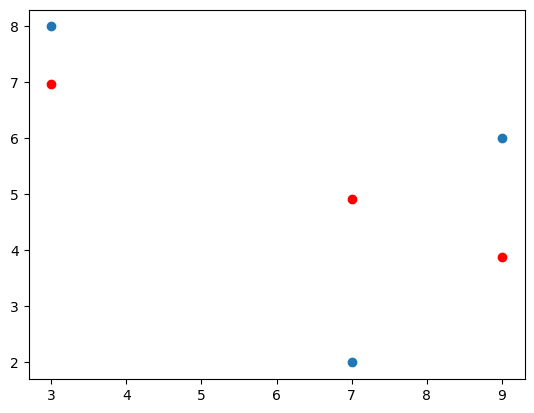

In [20]:
plt.scatter(np.array(X).flatten(), np.array(Y).flatten())
plt.scatter(np.array(X).flatten(), np.array(predictions).flatten(), c='red')
plt.show()

In [26]:
model = MyMLP([1, 3, 1])

In [27]:
model.train(X, Y, 0.01, 10000000, False)

In [28]:
predictions = []
for k in range(len(X)):
  predictions.append(model.predict(X[k], False))
  print(predictions[k])

[7.999856974820702]
[2.00096142747023]
[5.999252816531396]


In [29]:
predictions_inputs = []
predictions = []
for i in range(100):
  predictions_inputs.append(i / 10.0)
  predictions.append(model.predict([i/ 10.0], False)[0])

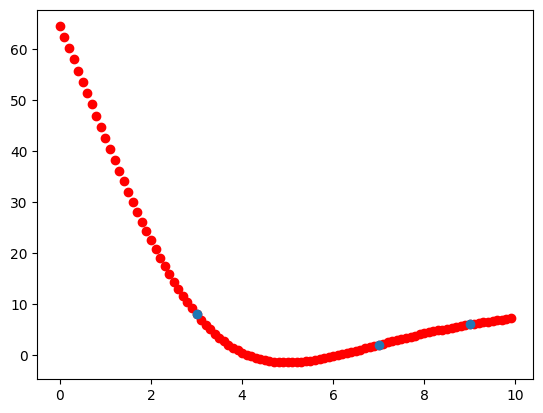

In [30]:
plt.scatter(predictions_inputs, predictions, c='red')
plt.scatter(np.array(X).flatten(), np.array(Y).flatten())
plt.show()